# Perbandingan Algoritma Machine Learning untuk Membangun Model Klasifikasi

### 1. Membuat synthetic dataset

In [1]:
from sklearn.datasets import make_classification

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [3]:
x.shape

(1000, 5)

In [4]:
y.shape

(1000,)

### 2. Membagi data (80% untuk data latih dan 20% untuk data uji)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
x_train.shape, y_train.shape

((800, 5), (800,))

In [27]:
x_test.shape, y_test.shape

((200, 5), (200,))

### 3. Membangun model klasifikasi

In [28]:
# import algoritma ML untuk klasifikasi

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [29]:
# konfigurasi setiap classifier

names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", 
        "AdaBoost", "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [30]:
# melakukan iterasi untuk mendapatkan skor akurasi dari 14 classifier
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

In [31]:
scores

[0.845,
 0.85,
 0.805,
 0.81,
 0.875,
 0.835,
 0.88,
 0.84,
 0.865,
 0.88,
 0.84,
 0.855,
 0.835,
 0.825]

### 4. Evaluasi Performa

In [32]:
import pandas as pd
import seaborn as sns

In [34]:
# membuat dataframe 
data = pd.DataFrame()
data['name'] = names
data['score'] = scores
data

,name,score
0,Nearest_Neighbors,0.845
1,Linear_SVM,0.850
2,Polynomial_SVM,0.805
3,RBF_SVM,0.810
4,Gaussian_Process,0.875
5,Gradient_Boosting,0.835
6,Decision_Tree,0.880
7,Extra_Trees,0.840
8,Random_Forest,0.865
9,Neural_Net,0.880


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2972\1452897637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="name", x="score", data=data, palette="deep")


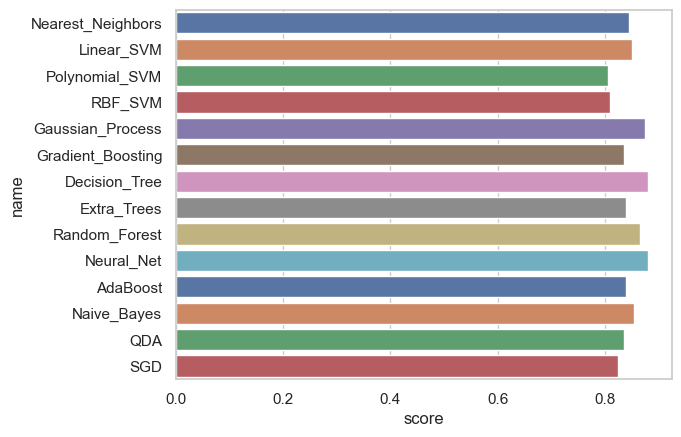

In [53]:
# visualisasi performa model
sns.set(style='whitegrid')
ax = sns.barplot(y="name", x="score", data=data, palette="deep")